In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import *

data=pd.read_csv("counters.offline.csv")

data2=pd.read_csv("counters.online.csv")

In [14]:
print(data2)

        run    cint7l0b  cmul7l0b  duration(s)  interacting_bunches
0    290222     2821944      1135         4613                    1
1    290223     1215525       507         2126                    1
2    290254    19597017      8005        15931                    2
3    290293   179288589     67797         3708                  376
4    290297   136426265     51979         2803                  376
..      ...         ...       ...          ...                  ...
182  292270   855332218    324706         3698                 2215
183  292273  2405815397    915526        10401                 2215
184  292274   999162786    380610         4354                 2215
185  292298  4403977663   1671359        19175                 2215
186  292397  1703934837    642637         7649                 2215

[187 rows x 5 columns]


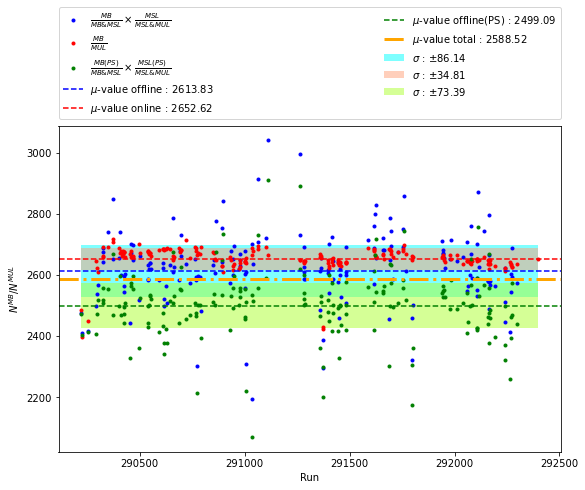

In [20]:
#l(2) and a(2) are respectively vertical and horizontal coordinates of plot with off(on)line data
#l3 accounts for physical selected events
#L(2,3) is the sum of the number of events per run in order to normalize our mu-value calculus
l=[]
lm=[]
a=[]
L=0
l2=[]
lm2=[]
a2=[]
L2=0
l3=[]
lm3=[]
a3=[]
L3=0

#m(2) and n(2) permit to calculate the mu-value obtained with off(on)line data
#m3 accounts for physical selected events
m=0
n=0
m2=0
n2=0
m3=0

#s(2,3) represent the standard deviations
s=0
s2=0
s3=0

#Fill in the lists with ratios and runs
for i in range(len(data.run)):
    lm += [data["cint7all"][i]*(data["cint7all"][i]/data["cint7all&0msl"][i])*(data["cmsl7all"][i]/data["cmsl7all&0mul"][i])]
    lm3 += [data["cint7ps"][i]*(data["cint7ps"][i]/data["cint7all&0msl"][i])*(data["cmsl7ps"][i]/data["cmsl7all&0mul"][i])]
    l += [(data["cint7all"][i]/data["cint7all&0msl"][i])*(data["cmsl7all"][i]/data["cmsl7all&0mul"][i])]
    l3 += [(data["cint7ps"][i]/data["cint7all&0msl"][i])*(data["cmsl7ps"][i]/data["cmsl7all&0mul"][i])]
    n += 1
    m +=lm [i]
    m3 += lm3[i]
    a += [data["run"][i]]
    L += data["cint7all"][i]
    L3 += data["cint7ps"][i]
    
m = m/L
m3 = m3/L3
    
for j in range(len(data2.run)):
    l2 += [data2["cint7l0b"][j]/data2["cmul7l0b"][j]]
    lm2 += [data2["cint7l0b"][j]*(data2["cint7l0b"][j]/data2["cmul7l0b"][j])]
    n2 += 1
    m2 += lm2[j]
    a2 += [data2["run"][j]]
    L2 += data2["cint7l0b"][j]
    
m2 = m2/L2

for i in range(len(l)):
    s += data["cint7all"][i]*(l[i]-m)**2
    s3 += data["cint7ps"][i]*(l3[i]-m3)**2
    
s = sqrt(s/L)
s3 = sqrt(s3/L3)

for j in range(len(l2)):
    s2 += data2["cint7l0b"][j]*(l2[j]-m2)**2
    
s2 = sqrt(s2/L2)

M=(m+m2+m3)/3
    
plt.figure(figsize=(9,6))

plt.plot(a,l,"b.",label=r"$\frac{MB}{MB& MSL}\times\frac{MSL}{MSL& MUL}$")
plt.plot(a2,l2,"r.",label=r"$\frac{MB}{MUL}$")
plt.plot(a,l3,"g.",label=r"$\frac{MB(PS)}{MB& MSL}\times\frac{MSL(PS)}{MSL& MUL}$")

plt.axhline(y=m,linestyle='--',color="blue",label=f"$\mu$-value offline : {round(m,2)}")
plt.fill_between(a2, m-s, m+s ,facecolor='cyan',alpha=0.5,label=f"$\sigma$ : $\pm${round(s,2)}")

plt.axhline(y=m2,linestyle='--',color="red",label=f"$\mu$-value online : {round(m2,2)}")
plt.fill_between(a2, m2-s2, m2+s2 ,facecolor='lightsalmon',alpha=0.5,label=f"$\sigma$ : $\pm${round(s2,2)}")

plt.axhline(y=m3,linestyle='--',color="green",label=f"$\mu$-value offline(PS) : {round(m3,2)}")
plt.fill_between(a2, m3-s3, m3+s3 ,facecolor='greenyellow',alpha=0.5,label=f"$\sigma$ : $\pm${round(s3,2)}")

plt.axhline(y=M,linestyle='-.',color="orange",linewidth=3,label=f"$\mu$-value total : {round(M,2)}")

plt.ylabel(r"$N^{MB}/N^{MUL}$")
plt.xlabel("Run")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.savefig("graph.pdf")